# PyTorch Workflow

In [2]:
what_were_covering = {1 : "data (prepare and load)",
                      2 : "building model",
                      3 : "fitting model",
                      4 : "predicting",
                      5 : "saving and loading model"}

In [3]:
import torch
from torch import nn # neural network
import matplotlib.pyplot as plt

## Data (prepare and load)

Спробуємо зробити лінійну регресію

In [4]:
weight = 0.7
bias = 0.3

start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

Розділення датасету на train та test набори даних
* train - 60% - модель навчається
* valid - 20% - перевірка точності, підгонка параметрів
* test - 20% - робота моделі, передбачення

In [7]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split] # 60% + 20%
X_test, y_test = X[train_split:], y[train_split:] # 20%

Візуалізація датасету

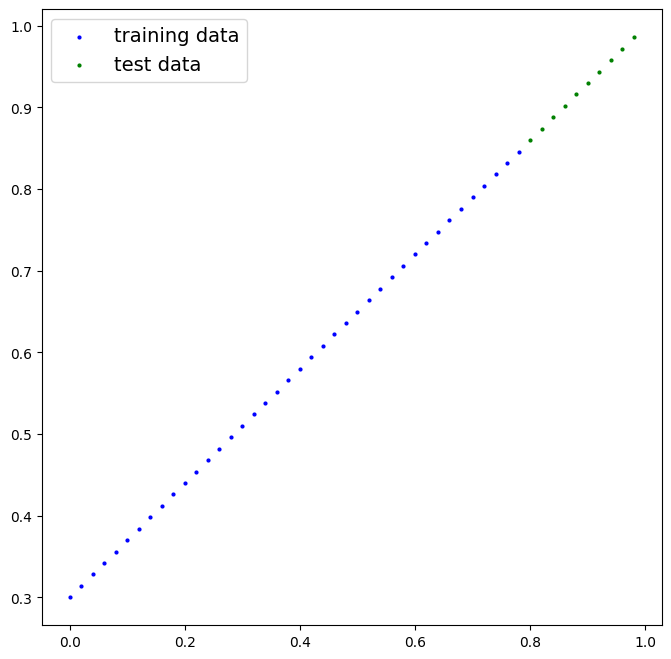

In [8]:
def plot_pred(predictions = None):
    plt.figure(figsize = (8,8))
    plt.scatter(X_train, y_train, c="b", s=4, label="training data")
    plt.scatter(X_test, y_test, c="g", s=4, label="test data")

    if predictions is not None:
        plt.scatter(X_test, predictions, c="r", s=4, label="predictions")

    plt.legend(prop={'size': 14})


plot_pred()

# Model

Лінійна регресія

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1,
                                               requires_grad=True,
                                               dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1,
                                             requires_grad=True,
                                             dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias